<div style="border:solid Chocolate 2px; padding: 40px">

<b> Михаил, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам аналитика. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

Я не смогу принять проект, если в нём будет хотя бы одна критичная ошибка или несколько некритичных ошибок - тогда проект нужно будет немного доработать. Но это нестрашно - я обязательно дам тебе подсказку или укажу верное направление.
    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from time import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


from sklearn.metrics import make_scorer, mean_squared_error
pd.set_option('display.max_column', None)

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Ты импортируешь библиотеки и модули, которые не используешь в проекте - так делать не стоит, так как ты забиваешь окружение лишними  инструментами.
    
В блоке импорта стоит оставить только то, что реально используется в проекте.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
закомментил лишнее
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [2]:
def read_scv(res1, res2):
    try:
        df = pd.read_csv(res1, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
    except:
        df = pd.read_csv(res2, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
    return df



def make_pie(data, feature, radius = 2):
    data[feature].value_counts().plot(kind='pie', 
                                   autopct='%1.1f%%', 
                                   radius=radius, 
                                   ylabel = '',
                                   title = feature,
                                   labeldistance=0.35,
                                   ).legend(bbox_to_anchor=(1.3, 1.3));

def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)**0.5

In [3]:
df = read_scv('autos.csv', '/datasets/autos.csv')

df.head(2)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные загружены - круто, что используешь `os` для управления путями файлов!
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

- DateCrawled — дата скачивания анкеты из базы  
- VehicleType — тип автомобильного кузова  
- RegistrationYear — год регистрации автомобиля  
- Gearbox — тип коробки передач  
- Power — мощность (л. с.)  
- Model — модель автомобиля  
- Kilometer — пробег (км)  
- RegistrationMonth — месяц регистрации автомобиля  
- FuelType — тип топлива  
- Brand — марка автомобиля  
- Repaired — была машина в ремонте или нет  
- DateCreated — дата создания анкеты  
- NumberOfPictures — количество фотографий автомобиля  
- PostalCode — почтовый индекс владельца анкеты (пользователя)  
- LastSeen — дата последней активности пользователя  

Признаки DateCrawled, DateCreated, LastSeen не несут в себе смысловой нагрузки для определения стоимости авто. дропнем сразу.
Туда же признак NumberOfPictures - так как там все нули

In [4]:
# Проверим на дубликаты сначала
df.duplicated().sum()

4

In [5]:
# Дропнем их
df.drop_duplicates(inplace=True)
df.shape

(354365, 16)

In [6]:
# посмотрим NumberOfPictures
df['NumberOfPictures'].value_counts()

0    354365
Name: NumberOfPictures, dtype: int64

In [7]:
#df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures'], axis=1, inplace=True)
# Дропнем их позже. Нужны будут для фильтрации

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно, эти признаки лишние.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354365 non-null  datetime64[ns]
 1   Price              354365 non-null  int64         
 2   VehicleType        316875 non-null  object        
 3   RegistrationYear   354365 non-null  int64         
 4   Gearbox            334532 non-null  object        
 5   Power              354365 non-null  int64         
 6   Model              334660 non-null  object        
 7   Kilometer          354365 non-null  int64         
 8   RegistrationMonth  354365 non-null  int64         
 9   FuelType           321470 non-null  object        
 10  Brand              354365 non-null  object        
 11  Repaired           283211 non-null  object        
 12  DateCreated        354365 non-null  datetime64[ns]
 13  NumberOfPictures   354365 non-null  int64   

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Обрати внимание, что ты удаляешь много строк, которые не являются дубликатами на самом деле. После того, как ты удалил лишние признаки, шансы того, что оставшиеся признаки будут пересекаться, вырастают. Давай проверим дубликаты до удаления лишних признаков и посмотрим, сколько их будет - напомню, что сейчас у тебя их `21333`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
поправил
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [9]:
# Выделим числовые признаки (в том числе целевая переменная) и категориальные
num_features = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'PostalCode']
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

**Посмотрим на числовые признаки**

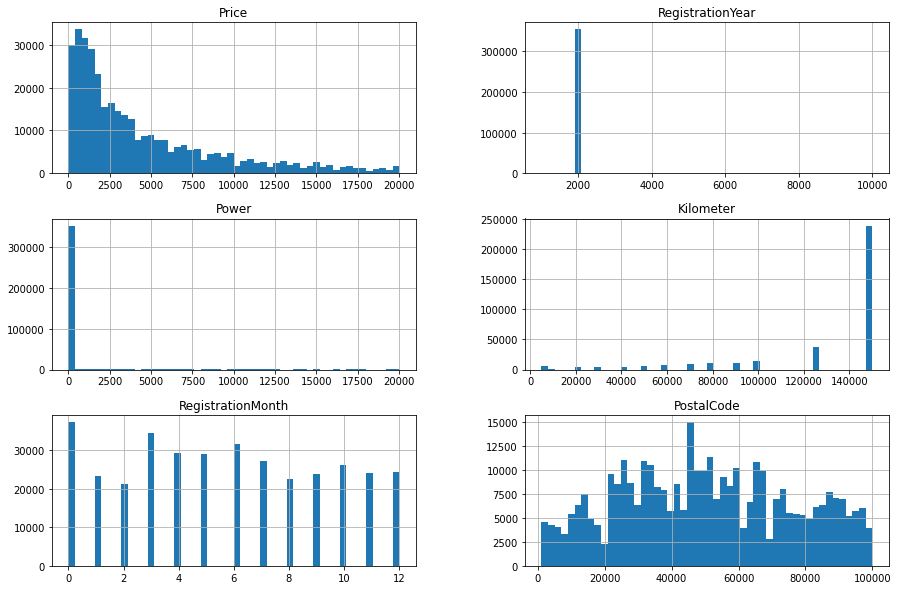

In [10]:
# Посмотрим распределение
df[num_features].hist(figsize=(15,10), bins=50);

Что сразу бросается в глаза:  
- нулевая цена присутствует. А так график распределения интересный - дешевых больше, дорогих меньше. И уменьшение похоже на логарифмическую шкалу.  
- присутсвуют какие то косяки с годом регистрации, мощностью.
- месяцев - 13 )))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее замечание:)

In [11]:
# посмотрим на количество "бесплатных" авто
df[df['Price'] == 0].shape[0]

10772

In [12]:
# Будем предполагать, что нулевая цена нам неинтересна.
df = df[df['Price'] != 0]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Нулевые цены удалили - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Стоит также удалить слишком дорогие и слишком дешёвые объявления, численность которых невелика: такие объявления не так часто бывают, но учиться модели они мешают.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
поправил
 </div>


<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [13]:
# Посмотрим, сколько удалим, при удалении по 2.5% c каждой стороны (самых дешевых и самых дорогих)
print(df[df['Price'] < df['Price'].quantile(0.025)].shape[0])
print(df[df['Price'] > df['Price'].quantile(0.975)].shape[0])

6690
8510


In [14]:
# Нормально. удалим порядка 4%
df = df[(df['Price'] > df['Price'].quantile(0.025))&(df['Price'] < df['Price'].quantile(0.975))]
df.shape[0]

326314

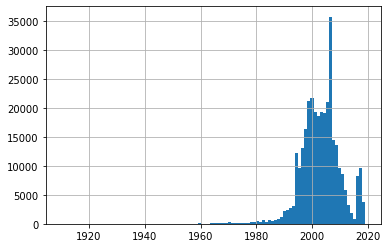

In [15]:
# Найдем косяки в годе регистрации
df[(df['RegistrationYear'] > 1900)&(df['RegistrationYear'] < 2020)]['RegistrationYear'].hist(bins=100);

In [16]:
# Видим, что смело можно обрезать год регистрации с 1960-го по 2020-й
df = df[(df['RegistrationYear'] > 1960)&(df['RegistrationYear'] < 2020)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По нижней границе фильтрация в норме.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По верхней границе дату регистрации нужно синхронизировать с датой выгрузки данных из базы: в базе данных не может быть объявлений моложе даты выгрузки, иначе это были бы просто данные из будущего.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
поправил ниже
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [17]:
# Учтем замечание. Год регистрации не может быть позже создания анкеты. Посмотрим коло-во гостей из будущего
(df['DateCrawled'].apply(lambda x: x.year) < df['RegistrationYear']).sum()

13386

In [18]:
# Уберем их
df = df[df['DateCreated'].apply(lambda x: x.year) > df['RegistrationYear']]
df.shape[0]

304245

In [19]:
# посмотрим на "самолеты"
df[df['Power']>500]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1816,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no,2016-03-22,0,22043,2016-03-22 21:43:26
4060,2016-04-03 20:31:00,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no,2016-04-03,0,60326,2016-04-07 14:56:46
5328,2016-03-29 19:44:48,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,NaN,2016-03-29,0,33154,2016-04-06 05:44:36
6296,2016-03-31 23:50:47,599,small,2002,manual,603,matiz,5000,11,petrol,chevrolet,yes,2016-03-31,0,44379,2016-04-01 03:41:52
6504,2016-03-14 15:54:34,3000,small,2009,manual,771,punto,125000,0,petrol,fiat,NaN,2016-03-14,0,40721,2016-03-14 15:54:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348883,2016-03-13 11:51:57,7500,sedan,2011,manual,1548,scenic,90000,4,petrol,renault,NaN,2016-03-13,0,24568,2016-04-06 15:17:39
348968,2016-04-04 18:53:25,250,small,1999,manual,1241,ypsilon,150000,5,petrol,lancia,yes,2016-04-04,0,28259,2016-04-04 18:53:25
351947,2016-03-07 21:36:19,1500,bus,2001,manual,1001,zafira,5000,7,gasoline,opel,no,2016-03-07,0,66117,2016-03-09 12:47:08
353633,2016-03-23 23:55:21,2400,sedan,2007,manual,650,c2,150000,8,petrol,citroen,NaN,2016-03-23,0,45277,2016-03-27 01:15:17


In [20]:
# И посмотрим на "ненулевых черепах"
# Старенькие машины могут быть мощностью 30-40 л.с.
df[(df['Power']<30)&(df['Power']!=0)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
431,2016-03-20 20:45:27,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,no,2016-03-20,0,90562,2016-04-03 04:17:08
1235,2016-03-08 20:43:16,4450,small,1971,manual,23,500,70000,5,petrol,fiat,no,2016-03-08,0,33729,2016-04-05 18:44:51
1331,2016-04-03 19:53:44,650,NaN,1970,NaN,26,NaN,100000,5,NaN,trabant,NaN,2016-04-03,0,9337,2016-04-05 20:45:24
3349,2016-03-29 17:37:58,1990,small,2004,NaN,7,polo,150000,5,gasoline,volkswagen,no,2016-03-29,0,37124,2016-04-02 05:16:40
4637,2016-03-21 00:36:23,870,wagon,2000,manual,16,focus,150000,0,NaN,ford,no,2016-03-21,0,66693,2016-03-21 08:40:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350502,2016-03-07 13:51:22,6200,small,1964,manual,20,NaN,40000,6,petrol,sonstige_autos,no,2016-03-07,0,41334,2016-04-07 02:44:20
353127,2016-03-26 18:53:12,8600,convertible,2012,manual,8,NaN,5000,3,gasoline,sonstige_autos,no,2016-03-26,0,82399,2016-04-06 08:17:29
353447,2016-03-27 00:46:19,2900,small,1969,manual,18,500,5000,8,petrol,fiat,no,2016-03-26,0,74076,2016-03-28 17:45:04
353501,2016-03-27 13:49:55,11300,sedan,1988,manual,29,other,150000,3,petrol,citroen,no,2016-03-27,0,18347,2016-04-07 09:46:17


Мда, судя по всему кто - то ставил вместо мощности объем двигателя, отсюда и выплыло. Реношка с 1,5 тыс лошадей это сильно.
Грохнем все, что выше 500 и ниже 30

In [21]:
df = df[(df['Power']<500)&(df['Power']>30)]
# Посмотрим на машины без мощности
df.shape[0]

276179

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалили слишком высокие значения мощности - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Слишком низкие значения также стоит удалить: ниже ты их заменяешь на медианы, но так ты меняешь только один параметр целого невалидного объявления. Если удалять все объявления с низкой мощностью, то необходимость замены ниже отпадает.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
поправил
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [22]:
# теперь можно грохнуть ненужные признаки
df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures'], axis=1, inplace=True)

In [23]:
df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276179 entries, 2 to 354368
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Price              276179 non-null  int64
 1   RegistrationYear   276179 non-null  int64
 2   Power              276179 non-null  int64
 3   Kilometer          276179 non-null  int64
 4   RegistrationMonth  276179 non-null  int64
 5   PostalCode         276179 non-null  int64
dtypes: int64(6)
memory usage: 14.7 MB


**Теперь посмотрим на категориальные признаки**

In [24]:

df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276179 entries, 2 to 354368
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   VehicleType  271992 non-null  object
 1   Gearbox      271701 non-null  object
 2   Model        266734 non-null  object
 3   FuelType     264235 non-null  object
 4   Brand        276179 non-null  object
 5   Repaired     238294 non-null  object
dtypes: object(6)
memory usage: 14.7+ MB


Видим, что много пропусков. Но пока с ними ничего делать не будем. Хочу посмотреть, какие модели как отработают с пропусками.

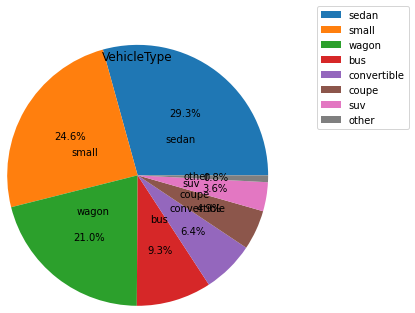

In [25]:
make_pie(df, 'VehicleType', 1.5)

Видим, что типов кузовов немного, каких то больше, каких то меньше.

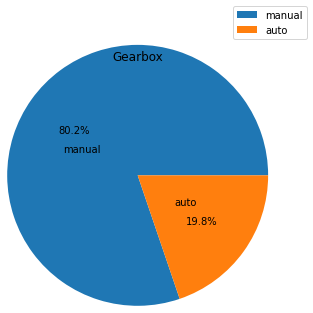

In [26]:
make_pie(df, 'Gearbox', 1.5)

Тоже все логично: ручка и автомат

In [27]:
df['Model'].nunique()


249

Понимаем, что брэндов много, а моделей еще больше. В "пирожок" все не влазят.

In [28]:
df['FuelType'].value_counts(normalize=True)

petrol      0.668761
gasoline    0.311204
lpg         0.017235
cng         0.001790
hybrid      0.000681
other       0.000201
electric    0.000129
Name: FuelType, dtype: float64

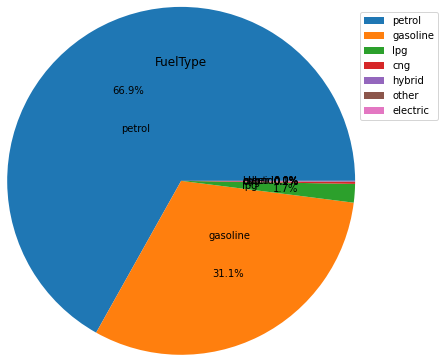

In [29]:
make_pie(df, 'FuelType')

Видим, что 67% это бензин/дизель, 31% - газ, и остальное по мелочи. Возможно есть смысл все эти гибриды и непонятные абревиатуры заменить на other, но пока оставим.

In [30]:
df['Brand'].nunique()

40

Брэндов тоже прилично, тоже не влазят в "пирог". Итак. На 40 брэндов 249 моделей. Грубо в среднем по 6 моделей на бренд

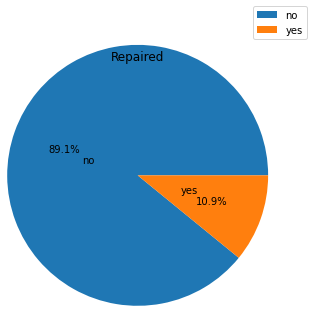

In [31]:
make_pie(df, 'Repaired', 1.5)

Тоже логично. либо ремонтировался либо нет.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276179 entries, 2 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              276179 non-null  int64 
 1   VehicleType        271992 non-null  object
 2   RegistrationYear   276179 non-null  int64 
 3   Gearbox            271701 non-null  object
 4   Power              276179 non-null  int64 
 5   Model              266734 non-null  object
 6   Kilometer          276179 non-null  int64 
 7   RegistrationMonth  276179 non-null  int64 
 8   FuelType           264235 non-null  object
 9   Brand              276179 non-null  object
 10  Repaired           238294 non-null  object
 11  PostalCode         276179 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 27.4+ MB


**Предварительные выводы:**  
Данные довольно сырые. В идеале необходима доработка, чтобы нельзя было оставить незаполненное поле. Можно подтянуть словарь - чтобы для мощности реношки нельзя было указать 1.5 тыс лошадок. То же с годом выпуска. Есть аномалии чуть ли не до нашей эры и пепелацы будущего.
- Удалили неинформативные признаки  
- Удалили дубликаты  
- Убрали аномалии по годам, мощности  
- Обработали нули в мощности по возможности
- Отметили что пропуски только в категориальных признаках, в числовых пропусков нет.  
Можно было бы поиграться с заполнением пропусков на этом этапе. Но чем адекватным кроме заглушки их заполнить не получится. Поэтому мы их оставляем. Обрабатывать будем в препроцессинге пайплайна (так интереснее, для тренировки). Переводить в число будем LabelEncoderom, а он Nan-ам выделяет отдельную категорию.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неплохой подход к работе с пропусками:)

## Обучение моделей

<div class="alert alert-info"> <b>Комментарий студента:</b> 
На локальной машине у меня все модели отработали отлично. На платформе 2 из 4 ушли думать на несколько часов.  
LightGBM у меня отрабатывает за 30 сек, на платформе - первый раз полчаса, потом вообще перестала работать (подбор гиперпараметров частично уменьшил, частично закоментил).   
Пришлось всё закоментить и переписать в более простом виде.   
Для выполнения задания (одна модель не бустинг) добавляю линейную регрессию.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, локальная работа - наш кандидат:)

In [33]:
# Разбивка датасета на тренировочную, валидационную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], random_state=666, test_size=0.3)

# проверка
print('Размер признаков на обучающей выборке', X_train.shape)
print('Размер целевой переменной на обучении', y_train.shape)
print('Размер призаков на тестовой выборке', X_test.shape)
print('Размер целевой переменной на тесте', y_test.shape)

Размер признаков на обучающей выборке (193325, 11)
Размер целевой переменной на обучении (193325,)
Размер призаков на тестовой выборке (82854, 11)
Размер целевой переменной на тесте (82854,)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Со сплитованием порядок!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Обрати внимание, что `LabelEncoder()` предназначен только для кодирования целевого признака - именно поэтому он не работае с `DataFrame`, только с `Series`:
    
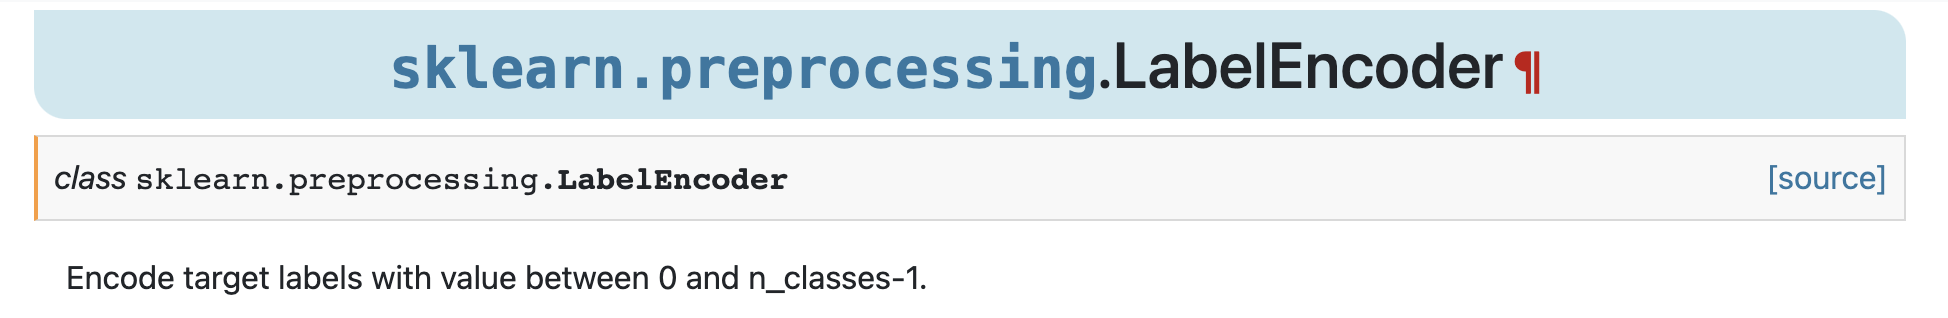
    
Для порядкового кодирования нужно использовать `OrdinalEncoder()` - он отлично работает с двумерными массивами, поэтому нужды писать свой класс не будет.
    
Также для линейной модели технику порядкового кодирования использовать нельзя: таким образом вес признака с большим количеством уникальных значений будет выше веса призака с меньшим количество уникальны значений, и модель ошибочно будет интерпретировать этот признак как более важный, что не всегда будет правдой.
    
Для линейной модели категориальные признаки нужно кодировать техникой `OneHotEncoder()`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [34]:
# Препроцесиснг для линейных моделей
numeric_preprocessor = Pipeline(steps=[("scaler", StandardScaler())])

categorical_preprocessor = Pipeline(steps=[("labelencoder", OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
        ("categorical", categorical_preprocessor, cat_features),
        ("numerical", numeric_preprocessor, num_features[1:]),
    ])

In [35]:
# 0. LinearRegressor.

pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regressor", LinearRegression())]
)

param_grid = {}

grid_search_lr = RandomizedSearchCV(pipe,
                           param_grid, 
                           n_jobs=-1, 
                           cv=3)

In [36]:
start = time() #Время обучения по фолдам сv = 3
grid_search_lr.fit(X_train, y_train)
end = time()
time_grid_lr = (end-start)/60

start = time() #время обучения на трейне
grid_search_lr.best_estimator_.fit(X_train, y_train)
end = time()
time_fit_lr = (end-start)/60

start = time() #время предсказания на трейне
y_pred_train = grid_search_lr.best_estimator_.predict(X_train)
end = time()
time_pred_lr = (end-start)/60


rmse_lr = rmse(y_pred_train, y_train)

In [37]:
# для леса и бустингов упрощаем по максимуму
data = df.copy()

# заглушки
data.fillna('other', inplace=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Кодирование данных нужно осуществлять только после сплитования - так мы не допускаем утечку данных из тестовой части, а также можем контролировать появление в `test` новых значений категориальных признаков.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
перенес под сплит
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [38]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price', axis=1), 
                                                    data['Price'],
                                                    random_state=666,
                                                    test_size=0.3)

oe = OrdinalEncoder()
X_train[cat_features] = oe.fit_transform(X_train[cat_features])
X_test[cat_features] = oe.transform(X_test[cat_features])

scaler = StandardScaler()
X_train[num_features[1:]] = scaler.fit_transform(X_train[num_features[1:]])
X_test[num_features[1:]] = scaler.transform(X_test[num_features[1:]])


print('Размер признаков на обучающей выборке', X_train.shape)
print('Размер целевой переменной на обучении', y_train.shape)
print('Размер призаков на тестовой выборке', X_test.shape)
print('Размер целевой переменной на тесте', y_test.shape)

Размер признаков на обучающей выборке (193325, 11)
Размер целевой переменной на обучении (193325,)
Размер призаков на тестовой выборке (82854, 11)
Размер целевой переменной на тесте (82854,)
CPU times: user 1.15 s, sys: 142 ms, total: 1.29 s
Wall time: 1.29 s


In [39]:
model_table = pd.DataFrame(columns=('name', 'time_grid', 'time_fit', 'time_predict', 'RMSE'))

In [40]:
%%time
#1 Лес

model_rfr = RandomForestRegressor()

grid = {'n_estimators':[5, 100],
        #'max_depth':[5, 10],
        #'min_samples_split':[x for x in range(3,5)],
        #'min_samples_leaf':[x for x in range(2,4)],
       }

search_rfr = RandomizedSearchCV(model_rfr,
                                grid,
                                scoring = make_scorer(rmse, greater_is_better=False),
                                cv = 3,
                                n_jobs = -1,
                                random_state = 666)

start = time() #засекаем время поиска по сетке

search_rfr.fit(X_train, y_train)

end = time()
time_grid_rfr = (end-start)/60


CPU times: user 4min 6s, sys: 7.44 s, total: 4min 14s
Wall time: 4min 14s


In [41]:
rmse_rfr = -search_rfr.best_score_
rmse_rfr

1438.9189170205266

In [42]:
start = time() #засекаем время обучения
search_rfr.best_estimator_.fit(X_train, y_train)
end = time()
time_fit_rfr = (end-start)/60 

start = time() #засекаем время предсказания
y_pred_train = search_rfr.best_estimator_.predict(X_train)
end = time()
time_pred_rfr = (end-start)/60

In [43]:
model_table = model_table.append( {'name':'model_rfr',
                                   'time_grid':time_grid_rfr,
                                    'time_fit': time_fit_rfr,
                                     'time_predict': time_pred_rfr,
                                      'RMSE': rmse_rfr}, ignore_index = True)

In [44]:
# 2. LGBMRegressor
"""
model_lgbm = LGBMRegressor()

grid = {'max_depth': [x for x in range(9, 11)],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [x for x in range(100, 201, 100)]}

search_lgbm = RandomizedSearchCV(model_lgbm, grid, cv = 3, n_jobs = -1, random_state = 666)

start = time() #засекаем время поиска по сетке
search_lgbm.fit(X_train, y_train)
end = time()
time_grid_lgbm = (end-start)/60

rmse_lgbm = -search_lgbm.best_score_
"""

# параметры на локалке считаются 10 сек. Здесь больше 2 часов, так и не дождался
rmse_lgbm = 1504.6359
time_grid_lgbm = 'бесконечность'
best_params_lgbm = {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}


In [45]:
%%time
model_lgbm = LGBMRegressor(**best_params_lgbm)

start = time() #засекаем время обучения
model_lgbm.fit(X_train, y_train)
end = time()
time_fit_lgbm = (end-start)/60 

start = time() #засекаем время предикта
y_pred_train = model_lgbm.predict(X_train)
end = time()
time_pred_lgbm = (end-start)/60

CPU times: user 12min 8s, sys: 17.1 s, total: 12min 25s
Wall time: 12min 29s


In [46]:
model_table = model_table.append( {'name':'model_lgbm',
                                   'time_grid':time_grid_lgbm,
                                    'time_fit': time_fit_lgbm,
                                     'time_predict': time_pred_lgbm,
                                      'RMSE': rmse_lgbm}, ignore_index = True)

In [47]:
# 3. CatBoostRegressor

model_cb = CatBoostRegressor()

grid = {'depth': [x for x in range(9,13,3)],
        'learning_rate': [0.05, 0.1]
       }

search_cb = RandomizedSearchCV(model_cb,
                               grid,
                               scoring = make_scorer(rmse, greater_is_better=False),
                               cv = 3,
                               n_jobs = -1,
                               random_state = 666)

start = time() #засекаем время поиска по сетке
search_cb.fit(X_train, y_train)
end = time()
time_grid_cb = (end-start)/60

0:	learn: 3916.3847211	total: 88.4ms	remaining: 1m 28s
1:	learn: 3780.8427367	total: 122ms	remaining: 1m
2:	learn: 3653.0258575	total: 151ms	remaining: 50.1s
3:	learn: 3532.4515988	total: 178ms	remaining: 44.4s
4:	learn: 3421.6230372	total: 206ms	remaining: 40.9s
5:	learn: 3315.0530800	total: 234ms	remaining: 38.8s
6:	learn: 3215.3688140	total: 262ms	remaining: 37.2s
7:	learn: 3120.2316619	total: 287ms	remaining: 35.6s
8:	learn: 3031.3240656	total: 314ms	remaining: 34.5s
9:	learn: 2948.1616500	total: 341ms	remaining: 33.7s
10:	learn: 2869.8555342	total: 368ms	remaining: 33.1s
11:	learn: 2796.5453931	total: 395ms	remaining: 32.5s
12:	learn: 2727.0781297	total: 422ms	remaining: 32.1s
13:	learn: 2662.9317938	total: 450ms	remaining: 31.7s
14:	learn: 2602.2595168	total: 476ms	remaining: 31.3s
15:	learn: 2545.9650148	total: 504ms	remaining: 31s
16:	learn: 2490.8143394	total: 533ms	remaining: 30.8s
17:	learn: 2440.3404301	total: 564ms	remaining: 30.8s
18:	learn: 2394.5908497	total: 591ms	rema

In [48]:
rmse_cb = -search_cb.best_score_
rmse_cb

1383.7066690443814

In [49]:
start = time() #засекаем время обучения
search_cb.best_estimator_.fit(X_train, y_train)
end = time()
time_fit_cb = (end-start)/60 

start = time() #засекаем время предикта
y_pred_train = search_cb.best_estimator_.predict(X_train)
end = time()
time_pred_cb = (end-start)/60



0:	learn: 3749.6629172	total: 98.7ms	remaining: 1m 38s
1:	learn: 3489.1357459	total: 198ms	remaining: 1m 38s
2:	learn: 3258.8330113	total: 298ms	remaining: 1m 38s
3:	learn: 3052.0422620	total: 401ms	remaining: 1m 39s
4:	learn: 2870.4263942	total: 518ms	remaining: 1m 43s
5:	learn: 2710.5545133	total: 619ms	remaining: 1m 42s
6:	learn: 2568.2391519	total: 720ms	remaining: 1m 42s
7:	learn: 2444.3437410	total: 817ms	remaining: 1m 41s
8:	learn: 2336.4155309	total: 916ms	remaining: 1m 40s
9:	learn: 2240.9452536	total: 1.02s	remaining: 1m 40s
10:	learn: 2159.6456908	total: 1.11s	remaining: 1m 40s
11:	learn: 2089.6318210	total: 1.22s	remaining: 1m 40s
12:	learn: 2025.6609529	total: 1.33s	remaining: 1m 40s
13:	learn: 1971.0708886	total: 1.43s	remaining: 1m 40s
14:	learn: 1920.0243361	total: 1.55s	remaining: 1m 41s
15:	learn: 1880.2124040	total: 1.66s	remaining: 1m 41s
16:	learn: 1841.3832846	total: 1.76s	remaining: 1m 41s
17:	learn: 1805.5059767	total: 1.86s	remaining: 1m 41s
18:	learn: 1775.124

In [50]:
model_table = model_table.append( {'name':'model_cb',
                                   'time_grid':time_grid_cb,
                                    'time_fit': time_fit_cb,
                                     'time_predict': time_pred_cb,
                                      'RMSE': rmse_cb}, ignore_index = True)

In [51]:
# Добавим в модель линейную регрессию
model_table = model_table.append( {'name':'model_lr', 
                                   'time_grid':time_grid_lr,
                                    'time_fit': time_fit_lr,
                                     'time_predict': time_pred_lr,
                                      'RMSE': rmse_lr}, ignore_index = True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Избавься, пожалуйста, от значений, введённых вручную.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
поправил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [52]:
model_table

,name,time_grid,time_fit,time_predict,RMSE
0,model_rfr,4.239496,1.354451,0.174077,1438.918917
1,model_lgbm,бесконечность,12.454327,0.042059,1504.635900
2,model_cb,14.074822,1.838976,0.024794,1383.706669
3,model_lr,1.836023,0.546317,0.008956,2238.857799


<div class="alert alert-info"> <b>Комментарий студента:</b> 
2 дня (уже 3)!!! потерял пытаясь реанимировать код, который на локалке отрабатывал за 10 минут. упрощаю

**Предварительные выводы**  
Пришлось упростить весь код. Платформа не тянет!!!  
Все бустинги и лес показали себя неплохо в плане точности. С заданием RMSE < 2500 справились все, включая LinearRegression.     
По времени подбора параметров лучшая модель - CatBoost (не учитывая линейную регрессию)   
По времени обучения лучшая модель - случайный лес   
По RMSE лучший результат у - у CatBoost  



<div class="alert alert-info"> <b>Комментарий студента:</b> 
На будущее. Для себя. Получается препроцессинг при анализе нескольких моделей лучше делать отдельно, а не запихивать в пайплайн. 
    
</div>

## Анализ моделей

In [53]:
%%time
# проверим лучшую модель

y_pred = search_cb.best_estimator_.predict(X_test)

print("RMSE на тестовой выборке:", rmse(y_pred, y_test))

RMSE на тестовой выборке: 1354.3236823156315
CPU times: user 601 ms, sys: 0 ns, total: 601 ms
Wall time: 616 ms


In [54]:
# Проверим на "дурачка"

dummy = DummyRegressor(strategy="mean")

dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy для теста RMSE:", rmse(y_pred_dummy, y_test))

Dummy для теста RMSE: 4048.3652793392453


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Подход к оценке модели на `test` верный - тут без вопросов:) Круто также, что сравниваешь свою модель с костантной!

**Предварительные выводы** 
- Проверили на тесте лучшую модель - CatBoost. Результат не хуже чем на трэйне, переобучения нет.
- Так же проверили модель на адекватность. Модель адекватна.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная в ходе оптимизации гиперпараметров, а время - это время обучения модели с лучшими гиперпарметрами и время совершения ею предсказаний.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть: 
- время кросс-валидации лучшей модели (сначала лучшую модель нашли, потом её же прогнали через `cross_val_score` или через `GridSearchCV` с пустым словарём параметров);
- время обучения и предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку (наш случай 😁), принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
    По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
2. Сравнительную характеристику модели стоит делать в виде таблицы - так будет проще сравнивать метоики между собой. Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды


3. Итоговый вывод нужно поправить.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Полностью все переписал. Упростил по максимуму.  
Выводы изменил. LGBM на платформе не канает. Время исполнения - можно состариться. У меня на локалке она лучшая и по времени и по RMSE
    
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтены следующие моменты:
1. Для линеной регрессии ты замерил время обучения и предсказания сразу - нужно по отдельности.
2. Ещё раз обрати внимание, что в проекте либо кросс-валидация, либо валидационная выборка - ты сейчас используешь два подхода одновременно. Как замерять время и метрику при каждом из них - см.выше. 

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    1. На линейной регрессии я только время обучения и померил (правда в пайплайне вместе с предобработкой). Понятно, что она самая быстрая. Но у нее и результата по rmse самый худший.  
    
    2.   
Я бы задал вам уточняющие вопросы, но вы работу выдерживаете сутки по регламенту. Итого 3 суток из-за того что платформа работает по несколько часов вместо нескольких минут и трое суток проверки. А уже новый спринт вовсю идет.
Как я сделал изначально - замерил время подбора гиперпарамметров, но при этом же и **модель обучается**, то есть получил время. Вы сказали нужно отдельно. Ок - замерил отдельно. Первый раз у меня подбор был сразу по rmse.
Вам не понравилось.
    
Я не понимаю, зачеи нам гридсёрчем подбирать параметры, а затем еще раз обучать и смотреть время обучения. 
    
Второй раз сделал все отдельно - подбор гиперпараметров, обучение, rmse на валидационной.
И rmse на тестовой у лучшей модели.
    Теперь у меня подход "двойной"
    
Вы пишите:  
Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:

оптимизация гиперпараметров и поиск лучшей модели; *сделал, замерил время*

оценка метрики RMSE; *сделал на валидационной выборке* (первый раз у меня оно сразу в best_score_ было)

оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация). *Непонятно о каком времени идет речь. Время обучения? я его померил 2 раза с подбором гиперпараметров и без на лучших параметрах. Время предсказания - я его тоже померял*

По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики RMSE и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке. *загнал все в одну таблицу и всё сравнил*
    
Если бы платформа норм работала - вопросов бы не было. Всё б уже поправил. Тут что то меняешь в ячейке и ждешь 2-3 часа пока она отработает. При этом она(ячейка) мне пишет, что работала 15 мин, а висела часа три.
    
Или мне теперь убрать валидационную и rmse найти трэйне? Ну валидационная же не нужна, такакая гридсёрчем польхз
    



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Замечание выше всё ещё не учтено: в проекте используем __либо__ подход с кросс-валидацией, __либо__ с валидационной выборкой. Сейчас у тебя по-прежнему используются разные подходы от модели к модели:
- линейную регрессию ты оценил вообще дважды - на `train` и на `test`, учитывая, что `test` - это воообще конец проекта и только для лучшей модели;
- `RMSE` для других моделей ты получаешь из `valid `выборки, хотя выше написано, что в случае использования кросс-валидации (а ты её используешь во время поиска лучшей модели) `RMSE` нужно мерить на кросс-валидации - в случае `RandomizedSearchCV` это атрибут `best_score_`. 
    
Ещё в первом комментарии всё подробно описано - пожалуйста, будь внимателен и следуй описанию.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Если бы понял комментарий сверху - исправил бы сразу. Я не понимаю, Вы не отвечаете на мои комментарии и вопросы.  
1 шаг - подбор параметров + обучение (получчаем best_estimator_)  
2 шаг обучение на той же выборке - с подобранными параметрами (юзаем best_estimator_ на той же самой выборке) Зачем?  

Поправил как понимаю Ваши комментарии!


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Михаил, в сообщении выше я вижу от тебя только один вопрос в самом конце комментаря, на который я тебе предоставил ответ. Всё остальное, как мне показалось, было больше рефлексией над тем, что выполненная работа была отмечена замечанием, а на вопросы о том, зачем нам искать лучшую модель и потом замерять по ней время обучения и предсказания, было рассказано ешё в первом комментарии, который я тебе предложил ещё раз перечитать.

    
Если какие-то конкретные места вызывают затруднения, формулируй __конкретные вопросы__ - я постараюсь дать __конкретные ответы__.
    
О текущем вопрос - я писал об этом в первом комментарии:
    
    на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на train.
    
Ответ не поменялся: в реальной рабочей среде ты не будешь каждый раз запускать поиск по сетке для поиска лучшей модели, чтобы делать предсказания - ты найдёшь лучшую модель, её оценишь, задеплоишь и будешь пользоваться результатом её работы. Так же и здесь: сначала мы находим лучшую модель, потом оцениваем её по ряду характеристик - `RMSE` и время. Также обрати внимание на условие задачи: `5. Проанализируйте время обучения, время предсказания и качество моделей.` - сказано про время обучения модели, а не время работы `RandomizedSearchCV` для поиска лучшей модели. А если `test` трогать нельзя до итогового тестирования, то на чём ещё мерить время, как ни на `train`? 
    

Тем не менее, мы с тобой уже четыре итерации говорим про то, что если используется инструмент поиска лучшей модели типа `RandomizedSearchCV`, нужна оценка на кросс-валидации - ты оцениваешь линейную регрессию то на `train`, то на `test`. В текущем решении - снова оценка на `train`. Подскажи, пожалуйста, какие сложности или непонимания есть в этом моменте?
    

**Выводы**  
Загрузили и изучили данные.  
Данные довольно сырые. В идеале необходима доработка, чтобы нельзя было оставить незаполненное поле. Можно подтянуть словарь - чтобы для мощности реношки нельзя было указать 1.5 тыс лошадок. То же с годом выпуска. Есть аномалии чуть ли не до нашей эры и пепелацы будущего.
- Удалили неинформативные признаки  
- Удалили дубликаты  
- Убрали аномалии по годам, мощности  
- Обработали нули в мощности по возможности
- Отметили что пропуски только в категориальных признаках, в числовых пропусков нет.  
Можно было бы поиграться с заполнением пропусков на этом этапе. Но чем адекватным кроме заглушки их заполнить не получится. Поэтому мы их оставляем. Обрабатывать будем в препроцессинге пайплайна (так интереснее, для тренировки).

Подготовили выборки и обучили несколько моделей (случайный лес, LightGBM, CatBoost, линейная регрессия).  
- Препроцессинг был OrdinalEncoder-ом (для линейной регрессии OneHotEncoder).  
- для каждой модели использовали RandomazedSearchCV (как менее затратный) для подбора гиперпараметров  
- Все бустинги и лес показали себя неплохо в плане точности. С заданием RMSE < 2500 справились все, включая линейную регрессию. Лучший результат у CatBoost rmse=1384. На платформе LightGBM не тянет.  По времени можно выбирать между лесом и CatBoost-ом


- Проверили на тесте лучшую модель - CatBoost. Результат не хуже чем на трэйне, переобучения нет.
- Так же проверили модель на адекватность. Модель адекватна.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный итоговый вывод!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не забудь скорректировать по итогу исправления замечаний.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Пока актуально.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Пока актуально.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Пока актуально.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Михаил, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны почти все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных. Отмечу также классную техническую сторону проекта - круто, что используешь `pipeline` и `columnstransformer` для комбинации разных модельных инструментов!

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец!
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Михаил, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.2`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Михаил, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.3`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.4.

Михаил, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.4`.
    
Хочу также отметить, что мы с тобой прошли уже четыре итерации работы над проектом - это значит, что осталось только две попытки сдать проект перед уходом в академ. Всё, что нужно сделать, довольно подробно описано в комментариях. Пожалуйста, почитай внимательно, что нужно сделать, задай конкретные вопросы о том, что не понимаешь, чтобы мы за оставшиеся две итерации могли завершить работу над проектом.
    
Жду тебя снова:)